In [18]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# uploading the data
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [27]:
# uploading the data
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [28]:
# uploading the data
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [29]:
import pandas as pd

# List the CSV files you want to combine
file_list = ["train.csv", "test.csv", "gender_submission.csv"]

# Read each CSV file into a separate DataFrame
dfs = [pd.read_csv(f) for f in file_list]

# Concatenate all DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

# Check the result
print("Combined DataFrame shape:", combined_df.shape)
print(combined_df.head())

# (Optional) Save the combined DataFrame to a new CSV file
combined_df.to_csv("combined_data.csv", index=False)


Combined DataFrame shape: (1727, 12)
   PassengerId  Survived  Pclass  \
0            1       0.0     3.0   
1            2       1.0     1.0   
2            3       1.0     3.0   
3            4       1.0     1.0   
4            5       0.0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0    1.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen, Miss. Laina  female  26.0    0.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen, Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0          

In [30]:
# getting the data into a dataframe object
df = pd.read_csv('combined_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [31]:
# Getting basic information about the data
print('Shape :',df.shape)
print('Number of rows:',df.shape[0])
print('Number of columns :', df.shape[1])

Shape : (1727, 12)
Number of rows: 1727
Number of columns : 12


In [32]:
# Getting an idea about the NULL values
df.isnull().sum().any()

True

In [38]:
# Before dropping:
print("Number of rows before dropping missing values:", len(df))

# Drop all rows with any missing values
df_clean = df.dropna()

print("Number of rows after dropping missing values:", len(df_clean))
print("Missing values after dropping:")
print(df_clean.isnull().sum())


Number of rows before dropping missing values: 1727
Number of rows after dropping missing values: 183
Missing values after dropping:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [40]:
df = pd.read_csv('combined_data.csv')
imputer = SimpleImputer(strategy='mean')
numeric_df = df.select_dtypes(include=[np.number])
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# If you have categorical columns, handle them separately (either impute with mode or drop)

# 2. Outlier Treatment (optional, depending on data)
# Using IQR method to remove outliers
Q1 = numeric_df_imputed.quantile(0.25)
Q3 = numeric_df_imputed.quantile(0.75)
IQR = Q3 - Q1
mask = ~((numeric_df_imputed < (Q1 - 1.5 * IQR)) | (numeric_df_imputed > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = numeric_df_imputed[mask]

# 3. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)



In [41]:
# Visulaizing the data

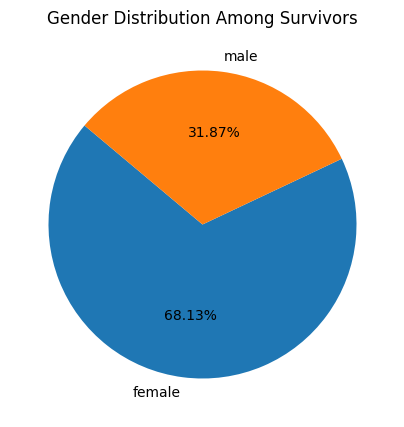

In [69]:
# Filter the DataFrame to only survivors
survivors = df[df['Survived'] == 1]

# Get the count of male vs. female survivors
survivor_counts = survivors['Sex'].value_counts()

# Pie chart for male vs. female survivors
plt.figure(figsize=(5,5))
plt.pie(survivor_counts.values,
        labels=survivor_counts.index,
        autopct='%.2f%%',
        startangle=140)
plt.title('Gender Distribution Among Survivors')
plt.show()

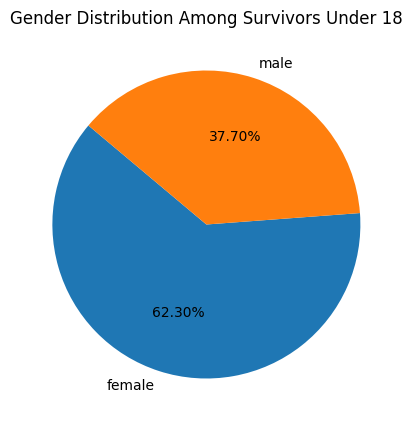

In [94]:
child_survivors = df[(df['Survived'] == 1) & (df['Age'] < 18)]

# Get the count of male vs. female survivors under 18
child_survivor_counts = child_survivors['Sex'].value_counts()

# Pie chart for male vs. female survivors under 18
plt.figure(figsize=(5,5))
plt.pie(child_survivor_counts.values,
        labels=child_survivor_counts.index,
        autopct='%.2f%%',
        startangle=140)
plt.title('Gender Distribution Among Survivors Under 18')
plt.show()

<ipython-input-44-a898182662a9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Survived', y = 'Sex', data = df, palette = 'Set3')


<Axes: xlabel='Survived', ylabel='Sex'>

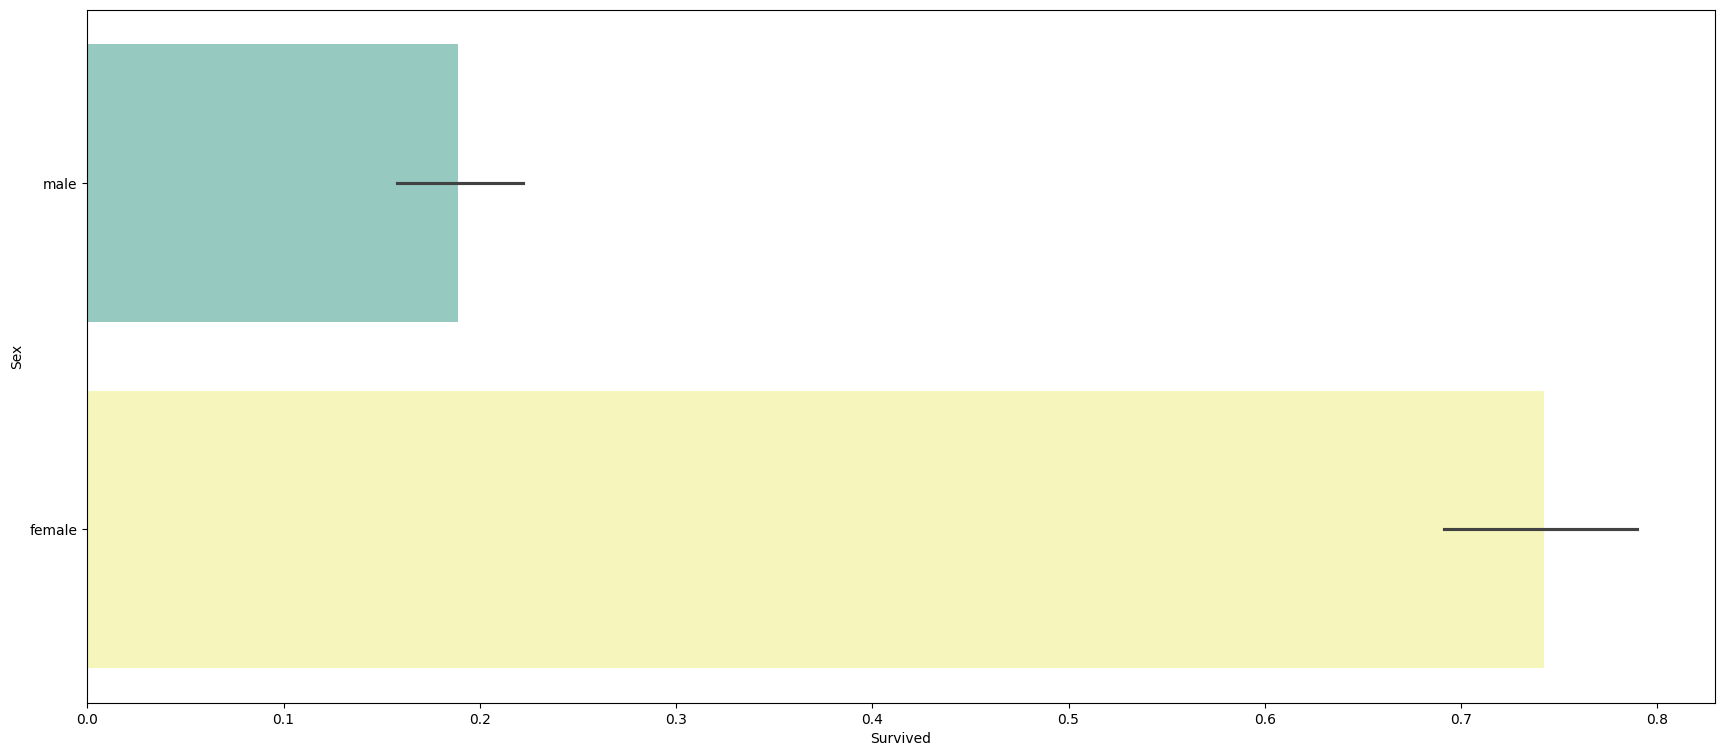

In [44]:
# Bar Plot
plt.figure(figsize = (21,9))
sns.barplot(x = 'Survived', y = 'Sex', data = df, palette = 'Set3')

In [71]:
df = pd.read_csv('combined_data.csv')

In [74]:
count_female = df[df['Sex'] == 'female']['Survived'].value_counts()
count_female

,count
Survived,
1.0,233
0.0,81


In [75]:
count_male = df[df['Sex'] == 'male']['Survived'].value_counts()
count_male

,count
Survived,
0.0,468
1.0,109


In [82]:
# Load training and test data (make sure files are present)
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Define target and features
y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Ensure the columns match between X and X_test (in case of missing dummies)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

# Make predictions on the test set
predictions = model.predict(X_test)

# Create output DataFrame
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

# Save to CSV
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [88]:
# Read the submission file back into a DataFrame
submission_df = pd.read_csv('submission.csv')

# Display the first few rows to verify
print(submission_df.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


Number of passengers above 18: 853
Number of passengers below 18: 154


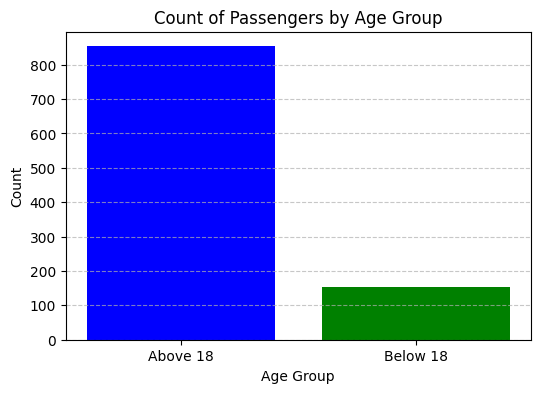

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('combined_data.csv')  # Replace 'combined_data.csv' with your filename

# Step 2: Count how many passengers are below 18 and how many are above 18
above_18_count = len(df[df['Age'] > 18])
below_18_count = len(df[df['Age'] < 18])

# Print the counts
print("Number of passengers above 18:", above_18_count)
print("Number of passengers below 18:", below_18_count)

# Step 3: Visualize the counts in a bar chart
labels = ['Above 18', 'Below 18']
counts = [above_18_count, below_18_count]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Count of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Number of passengers above 10: 960
Number of passengers below 10: 82


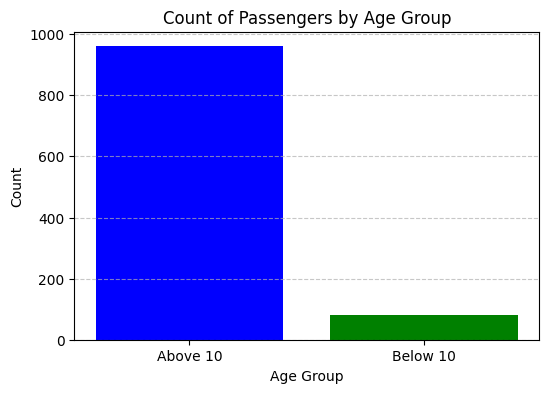

In [93]:
# Step 1: Read the CSV file into a DataFrame
df = pd.read_csv('combined_data.csv')  # Replace 'combined_data.csv' with your filename

# Step 2: Count how many passengers are below 18 and how many are above 18
above_10_count = len(df[df['Age'] > 10])
below_10_count = len(df[df['Age'] < 10])

# Print the counts
print("Number of passengers above 10:", above_18_count)
print("Number of passengers below 10:", below_18_count)

# Step 3: Visualize the counts in a bar chart
labels = ['Above 10', 'Below 10']
counts = [above_10_count, below_10_count]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['blue', 'green'])
plt.title('Count of Passengers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
